In [1]:
#import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df2= pd.read_csv("countrydeets.csv")
df2

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,Africa,10/28/21,189809912.0,118429867.0,76360930.0,28870.0
1,Africa,10/29/21,193296330.0,120094541.0,79415052.0,32750.0
2,Africa,10/30/21,194361624.0,120630098.0,80078265.0,71510.0
3,Africa,10/31/21,196480876.0,122001362.0,80759982.0,71510.0
4,Africa,11/1/21,197837482.0,122691032.0,81432762.0,124228.0
...,...,...,...,...,...,...
21002,Zimbabwe,4/13/22,10082431.0,5756469.0,3605713.0,720249.0
21003,Zimbabwe,4/14/22,10108149.0,5767690.0,3611223.0,729236.0
21004,Zimbabwe,4/15/22,10123580.0,5775884.0,3615375.0,732321.0
21005,Zimbabwe,4/16/22,10136913.0,5787969.0,3616123.0,732821.0


In [8]:

import json
import plotly.express as px
globe = json.load(open("countries.geojson",'r'))

In [ ]:
globe['features'][20]

In [9]:
county_id={}
for feature in globe['features']:
    feature['id']= feature['properties']['ISO_A3']
    county_id[feature['properties']['ADMIN']]=feature['id']

In [3]:
df2.columns

Index(['location', 'date', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'total_boosters'],
      dtype='object')

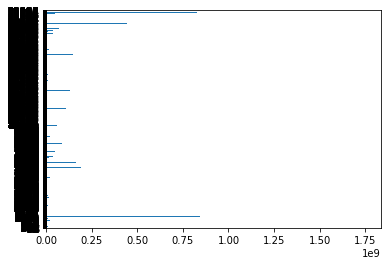

In [11]:
df2["total_boosters"].plot(kind ='barh');


In [11]:
df2 = df2[df2["location"].str.contains("Africa")==False]
df2 = df2[df2["location"].str.contains("Asia")==False]
df2 = df2[df2["location"].str.contains("Bahamas")==False]
df2 = df2[df2["location"].str.contains("Cote d'Ivoire")==False]
df2 = df2[df2["location"].str.contains("Sint Maarten")==False]
df2["location"].unique()
listofstrings = df2["location"].unique()
for countryname in listofstrings:
    if countryname not in county_id:
        df2 = df2[df2["location"].str.contains(countryname)==False]

In [38]:
df2['id']=df2['location'].apply(lambda x:county_id[x])
df2.head(10)

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,id
172,Albania,11/3/21,1926604.0,1025180.0,898625.0,2799.0,ALB
173,Albania,11/6/21,1944676.0,1031588.0,904858.0,8230.0,ALB
174,Albania,11/7/21,1947148.0,1032457.0,905876.0,8815.0,ALB
175,Albania,11/9/21,1963359.0,1037546.0,910845.0,14968.0,ALB
176,Albania,11/10/21,1971973.0,1040015.0,913524.0,18434.0,ALB
177,Albania,11/11/21,1980231.0,1042227.0,916432.0,21572.0,ALB
178,Albania,11/14/21,2000104.0,1047822.0,924194.0,28088.0,ALB
179,Albania,11/16/21,2016954.0,1051540.0,930527.0,34887.0,ALB
180,Albania,11/17/21,2025561.0,1053553.0,933630.0,38378.0,ALB
181,Albania,11/18/21,2033766.0,1055690.0,936539.0,41537.0,ALB


In [42]:

import plotly.express as px
 
# create figure
fig = px.choropleth(df2,locations=df2["id"],color=df2["people_vaccinated"],locationmode='ISO-3',title="world-wide vaccine distribution")
 
fig.show()